# Regresión de vectores de soporte
https://blog.paperspace.com/svr-kmeans-clustering-for-regression/
Ahora que hemos explorado la mayoría de los algoritmos de regresión que existen, exploremos el Support Vector Regression (SVR) es uno de los mejores algoritmos de regresión que se enfoca en manejar el error general y trata de evitar problemas atípicos mejor que algoritmos como la regresión lineal. Primero debemos tener una buena idea de qué son las máquinas de vectores de soporte antes de aprender sobre SVR, ya que la idea se deriva de allí.

## Máquinas de vectores soporte

El objetivo de la Máquina de vectores de soporte es crear un hiperplano en un espacio vectorial de N-Dimensiones, donde N es el número de características involucradas. Se espera que este hiperplano clasifique los puntos de datos que proporcionamos. Es un gran algoritmo de clasificación y funciona mejor que la regresión logística en muchos casos debido al hiperplano que mantiene los puntos de datos separados en comparación con una línea delgada que actúa como borde. La idea aquí es mantener los puntos de datos a ambos lados del plano, y los que caen dentro del plano son los valores atípicos aquí.

El kernel es el factor principal detrás del rendimiento de la Máquina de vectores de soporte que trabaja en la reducción de la dimensionalidad transformándola así en una ecuación lineal. También logra escalar relativamente bien a datos de alta dimensión. El kernel devuelve el producto interno entre dos puntos en una característica estándar. Hay diferentes tipos de funciones del kernel en SVM.

Gaussian Kernel se utiliza para realizar la transformación cuando no hay conocimiento previo sobre los datos. Cuando los datos son linealmente separables, se utiliza Linear Kernel. La similitud de los vectores en el conjunto de datos de entrenamiento en un espacio de características sobre los polinomios de las variables originales utilizadas en el kernel está representada por Polynomial Kernel.

## Entendiendo la SVR


Support Vector Regression utiliza el mismo principio detrás de Support Vector Machine. SVR también construye un hiperplano en un espacio vectorial N-Dimensional, donde N es el número de características involucradas. En lugar de mantener los puntos de datos alejados del hiperplano, aquí nuestro objetivo es mantener los puntos de datos dentro del hiperplano para la regresión. Uno de los parámetros ajustables es ε (épsilon), que es el ancho del tubo que creamos en el espacio de características. El siguiente parámetro de regularización que hiperafinamos es C, que controla la "holgura" (ξ) que mide la distancia a los puntos fuera del tubo. Veamos una implementación y visualización simple de SVR antes de comenzar la combinación de agrupamiento de K-Means y SVR. Aquí estamos utilizando el conjunto de datos de precios inmobiliarios de Kaggle.

In [21]:
df = pd.read_csv('Real estate.csv', encoding='utf-8')

In [22]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR # for building support vector regression model
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

# Read data into a dataframe
df = pd.read_csv('Real estate.csv', encoding='utf-8')
X=df['X2 house age'].values.reshape(-1,1)
y=df['Y house price of unit area'].values

# Building SVR Model
model = SVR(kernel='rbf', C=1000, epsilon=1) # set kernel and hyperparameters
svr = model.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100)
y_svr = model.predict(x_range.reshape(-1, 1))

plt = px.scatter(df, x=df['X2 house age'], y=df['Y house price of unit area'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Add SVR Hyperplane
plt.add_traces(go.Scatter(x=x_range,
	y=y_svr, name='Support Vector Regression', line=dict(color='blue')))
plt.add_traces(go.Scatter(x=x_range,
	y=y_svr+10, name='+epsilon', line=dict(color='blue', dash='dot')))
plt.add_traces(go.Scatter(x=x_range,
	y=y_svr-10, name='-epsilon', line=dict(color='blue', dash='dot')))

# Set chart background color
plt.update_layout(dict(plot_bgcolor = 'white'))

# Updating axes lines
plt.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

plt.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Update marker size
plt.update_traces(marker=dict(size=3))

plt.show()

Aquí podemos ver que a pesar de la distribución no lineal de los puntos de datos, SVR lo manejó perfectamente con el hiperplano. Este efecto es aún más evidente cuando tenemos más de una función en comparación con otros algoritmos de regresión. Ahora que tenemos una buena introducción a SVR, exploremos la increíble combinación de K-Means + SVR que puede crear maravillas en las circunstancias de regresión correctas.

# Clustering  de K-Means
La agrupación en clústeres de K-Means es un popular algoritmo de aprendizaje automático no supervisado para agrupar datos. El algoritmo funciona de la siguiente manera para agrupar puntos de datos:

Primero, definimos un número de grupos, sea K aquí
Elija aleatoriamente K puntos de datos como centroides de los grupos
Clasifique los datos en función de la distancia euclidiana a cualquiera de los grupos
Actualice los centroides en cada grupo mediante puntos de datos
Repita los pasos desde el paso 3 para un número determinado de veces (hiperparámetro: max_iter)
Aunque esto parece bastante simple, hay muchas maneras de hiperafinar el agrupamiento de K-Means. Esto incluye elegir correctamente los puntos para inicializar los centroides y mucho más. Discutiremos uno de ellos a continuación, el Coeficiente de silueta, que da una buena idea de cuántos grupos elegir.

## Implementación de agrupamiento de K-Means + SVR
Usaremos el mismo conjunto de datos de precios inmobiliarios de Kaggle para esta implementación. Aquí nuestras variables independientes son 'X3 distancia a la estación MRT más cercana' y 'X2 edad de la casa'. 'Y precio de la vivienda de la unidad de área' es nuestra variable objetivo sobre la cual realizaremos predicciones. Primero visualicemos los puntos de datos para definir la necesidad de agrupamiento.

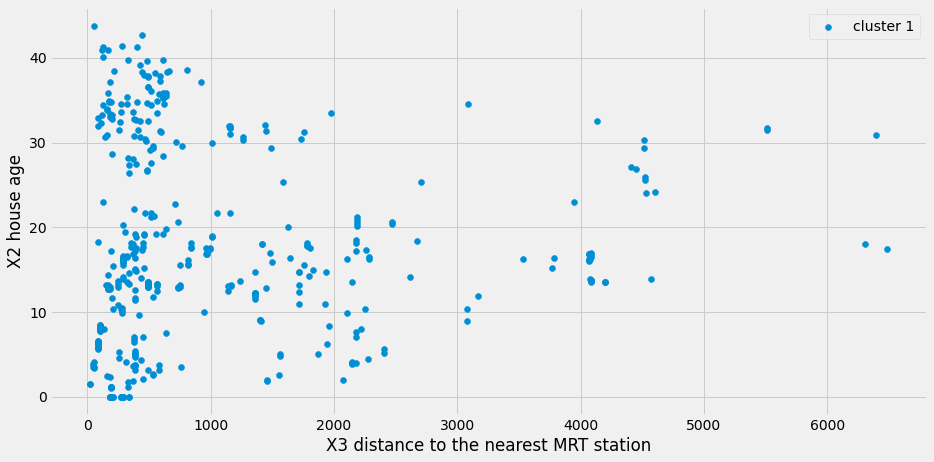

In [23]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt

# Read data into a dataframe
df = pd.read_csv('Real estate.csv', encoding='utf-8')

# Defining Dependent and Independant variable
X = np.array(df[['X3 distance to the nearest MRT station','X2 house age']])
Y = df['Y house price of unit area'].values

# Plotting the Clusters using matplotlib
plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=14)

plt.scatter(df['X3 distance to the nearest MRT station'],df['X2 house age'], label="cluster "+ str(1))
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("X2 house age")
plt.legend()
plt.show()

Claramente, los puntos de datos no tienen una buena distribución para adaptarse a un hiperplano que los contiene. Vamos a agruparlos usando el agrupamiento de K-Means. Antes de comenzar, podemos usar el Coeficiente de silueta para determinar la cantidad de grupos que necesitamos para mantener los puntos de datos con precisión en la cantidad de grupos seleccionada. Un mejor coeficiente o puntuación de silueta significa una mejor agrupación. Significa la distancia entre los grupos. Una puntuación máxima de 1 implica que los conglomerados están bien separados entre sí y también claramente diferenciados, una puntuación de 0 implica una distancia insignificante entre los conglomerados y -1 implica una asignación incorrecta de los conglomerados.

Primero evaluemos el coeficiente de silueta para nuestros puntos de datos. Dividiremos los datos en entrenar y probar desde aquí para comenzar a avanzar hacia nuestro objetivo final. La agrupación se ejecutará sobre los datos de entrenamiento.

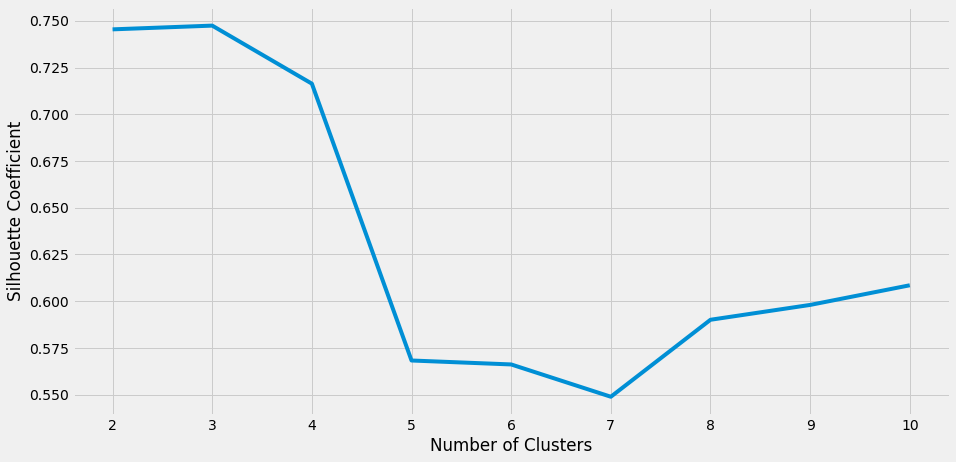

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from scipy import stats

X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.30, random_state=42)

silhouette_coefficients = []

kmeans_kwargs= {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42
}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)
    
# Plotting graph to choose the best number of clusters
# with the most Silhouette Coefficient score

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Podemos llegar a la conclusión de que con 3 clústeres podemos lograr un mejor agrupamiento. Avancemos y agrupemos los datos del conjunto de entrenamiento.

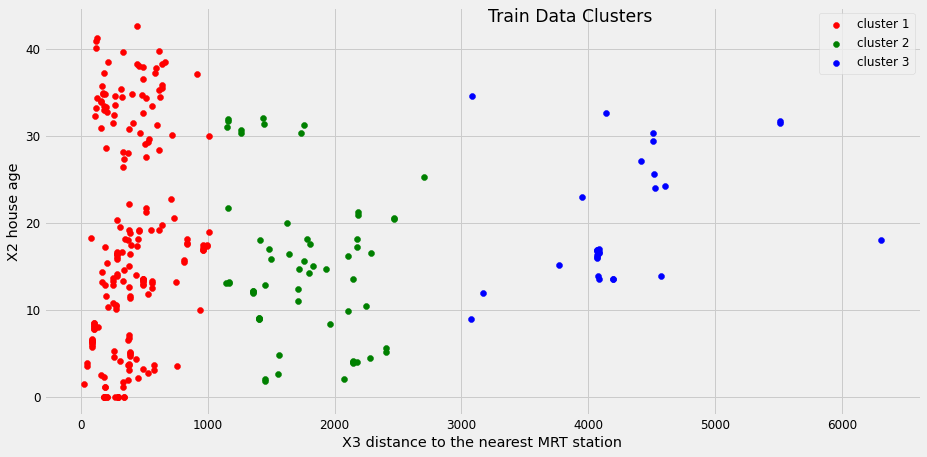

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Instantiate the model: KMeans from sklearn
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

# Fit to the training data
kmeans.fit(X_train)

train_df = pd.DataFrame(X_train,columns=['X3 distance to the nearest MRT station','X2 house age'])

# Generate out clusters
train_cluster = kmeans.predict(X_train)

# Add the target and predicted clusters to our training DataFrame
train_df.insert(2,'Y house price of unit area',Y_train) 
train_df.insert(3,'cluster',train_cluster) 
n_clusters=3
train_clusters_df = []
for i in range(n_clusters):
    train_clusters_df.append(train_df[train_df['cluster']==i])
    
colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=12)

# Plot X_train again with features labeled by cluster
for i in range(n_clusters):
  subset = []
  for count,row in enumerate(X_train):
      if(train_cluster[count]==i):
        subset.append(row)

  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label="cluster "+ str(i+1))
plt.title("Train Data Clusters", x=0.6, y=0.95)
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("X2 house age")
plt.legend()
plt.show()

## Creación de SVR para clústeres

Ahora, avancemos y construyamos modelos SVR para cada clúster. No nos estamos enfocando en el hiperajuste de SVR aquí. Si es necesario, se puede hacer probando varias combinaciones de valores de parámetros mediante una búsqueda en cuadrícula.

In [26]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR

n_clusters=3
cluster_svr = []
model = SVR(kernel='rbf', C=1000, epsilon=1)

for i in range(n_clusters):
    cluster_X = np.array((train_clusters_df[i])[['X3 distance to the nearest MRT station','X2 house age']])
    cluster_Y = (train_clusters_df[i])['Y house price of unit area'].values
    cluster_svr.append(model.fit(cluster_X, cluster_Y))

Definamos una función que prediga el precio de la vivienda (Y) prediciendo primero el grupo y luego el valor con el SVR correspondiente.

In [27]:
def regression_function(arr, kmeans, cluster_svr):
    result = []
    clusters_pred = kmeans.predict(arr)
    for i,data in enumerate(arr):
        result.append(((cluster_svr[clusters_pred[i]]).predict([data]))[0])
    return result, clusters_pred

Ahora que hemos construido nuestro flujo de end-to-end para la predicción y construido los modelos requeridos, podemos continuar y probar esto en nuestros datos de prueba. Primero visualicemos los clusters de datos de prueba con el  K means cluster que construimos, y luego encontremos el valor de Y usando el SVR correspondiente usando la función que hemos escrito arriba.

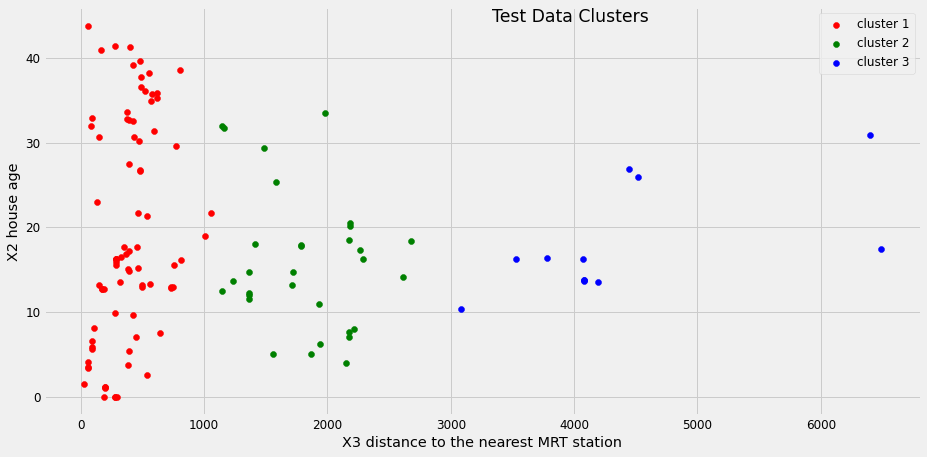

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# calculating Y value and cluster
Y_svr_k_means_pred, Y_clusters = regression_function(X_test,
	kmeans, cluster_svr)
    
colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=12)

n_clusters=3

# Apply our model to clustering the remaining test set for validation

for i in range(n_clusters):
  subset = []
  for count,row in enumerate(X_test):
      if(Y_clusters[count]==i):
        subset.append(row)

  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label="cluster "+ str(i+1))
plt.title("Test Data Clusters", x=0.6, y=0.95)
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("X2 house age")
plt.legend()
plt.show()

Podemos ver claramente que tenemos grupos definidos para datos de prueba y, también, obtuvimos el valor Y y se almacenaron en Y_svr_k_means_pred. Almacenemos los resultados y los datos en un marco de datos junto con el clúster.

In [29]:
import pandas as pd

result_df = pd.DataFrame(X_test,columns=['X3 distance to the nearest MRT station','X2 house age'])
result_df['Y true value'] =  Y_test
result_df['Y SVR + K means'] = Y_svr_k_means_pred
result_df['cluster'] = Y_clusters
result_df.head()

,X3 distance to the nearest MRT station,X2 house age,Y true value,Y SVR + K means,cluster
0,193.5845,1.1,45.1,70.943672,0
1,492.2313,13.2,42.3,74.662003,0
2,274.0144,0.0,52.2,72.037664,0
3,170.1289,12.7,37.3,70.631881,0
4,2185.1280,20.2,22.8,64.385493,1


Algunos de los resultados son realmente buenos y otros aún son mejores de lo que puede predecir un modelo de regresión lineal o SVR solo. Este fue solo un ejemplo de cómo abordar tales problemas y tanto K significa como SVR. Este método solo funciona bien cuando los puntos de datos no se distribuyen correctamente y hay margen para el manejo de datos agrupados. Este fue un ejemplo con solo dos variables independientes. Si los números aumentan, la complejidad también aumentará, lo que dificultará el manejo de estos casos con algoritmos ordinarios y, en tales casos, probar este método puede ayudar.

El enfoque que tuvimos aquí fue primero visualizar los datos o evaluar si existe la posibilidad de un manejo agrupado. Luego, realizar el agrupamiento de K-Means en los datos del tren. K-Means se puede hiperajustar utilizando la puntuación del coeficiente de silueta, que nos ayudará a obtener la cantidad ideal de grupos para nuestro problema. Después de agrupar, construimos la regresión de vector de soporte para cada grupo y el flujo de trabajo final que incluye todos los modelos que construimos sigue la idea de predecir primero el grupo y luego predecir la variable dependiente (Y) usando el modelo SVR correspondiente de ese grupo.